In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
netflix_dataset=pd.read_csv('/content/drive/MyDrive/combined_data_1.txt',header=None,names=['Cust_Id','Ratings'],usecols=[0,1])

In [ ]:
netflix_dataset.head(20)

,Cust_Id,Ratings
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
5,823519,3.0
6,893988,3.0
7,124105,4.0
8,1248029,3.0
9,1842128,4.0


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Ratings  float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [ ]:
netflix_dataset.isna().sum()

Cust_Id       0
Ratings    4499
dtype: int64

In [ ]:
# Check the number of unique Customers
customer_count=netflix_dataset['Cust_Id'].nunique()
customer_count=customer_count-4499
customer_count

470758

In [ ]:
stars=netflix_dataset.groupby('Ratings')['Ratings'].agg(['count'])
stars

,count
Ratings,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


<Axes: ylabel='Ratings'>

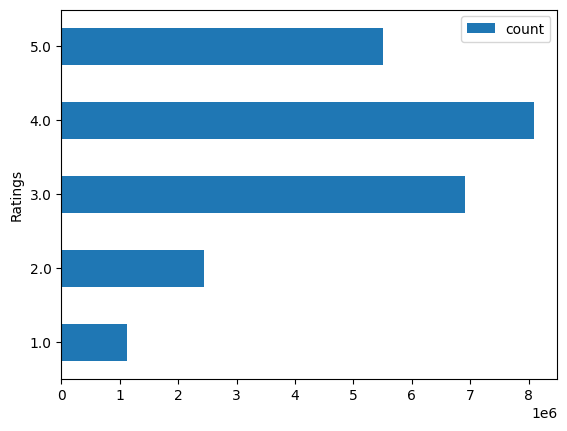

In [ ]:
stars.plot(kind='barh')

In [ ]:
#We're trying to add a new col, Movie ID , However we are aware that at null places there are movie ids

df_nan=pd.DataFrame(pd.isnull(netflix_dataset.Ratings))

In [ ]:
df_nan

,Ratings
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [ ]:
df_nan=df_nan[df_nan['Ratings']==True]
df_nan

,Ratings
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [ ]:
df_nan=df_nan.reset_index()
df_nan

,index,Ratings
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [ ]:
df_nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [ ]:
df_nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [ ]:
# np.full((row,col),filling value)

np.full((1,100),2)

array([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]])

In [ ]:
# Creating an empty arry for movie
# Creating a variable for movie id

movie_np=[]
movie_id=1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
  temp=np.full((1,i-j-1),movie_id)
  movie_np=np.append(movie_np,temp)
  movie_id+=1   # movie_id=movie_id +1

In [ ]:
df_nan.iloc[-1,0]

24057834

In [ ]:
movie_np

array([1.000e+00, 1.000e+00, 1.000e+00, ..., 4.498e+03, 4.498e+03,
       4.498e+03])

In [ ]:
len(movie_np)

24053336

In [ ]:
len(netflix_dataset)

24058263

In [ ]:
df_nan.iloc[-1,0]

24057834

In [ ]:
# The last record was getting missed , so we are trying to get last record to avoid any mismatch in dataset
last_record=np.full((1,len(netflix_dataset)-df_nan.iloc[-1,0]-1),movie_id)
movie_np=np.append(movie_np,last_record)

print(len(movie_np))

24053764


In [ ]:
len(netflix_dataset)-len(movie_np)   # The number of movies or we can say the null values

4499

In [ ]:
netflix_dataset=netflix_dataset[pd.notnull(netflix_dataset['Ratings'])]
netflix_dataset['Movie_Id']=movie_np.astype(int)
netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)

In [ ]:
netflix_dataset.head(15)

,Cust_Id,Ratings,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
6,893988,3.0,1
7,124105,4.0,1
8,1248029,3.0,1
9,1842128,4.0,1
10,2238063,3.0,1


from matplotlib import pyplot as plt
_df_0['Cust_Id'].plot(kind='hist', bins=20, title='Cust_Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Ratings'].plot(kind='hist', bins=20, title='Ratings')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Cust_Id', y='Ratings', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Movie_Id']
  ys = series['Cust_Id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Movie_Id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Movie_Id')
_ = plt.ylabel('Cust_Id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Movie_Id']
  ys = series['Ratings']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Movie_Id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Movie_Id')
_ = plt.ylabel('Ratings')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Movie_Id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Movie_Id'}, axis=1)
              .sort_values('Movie_Id', ascending=True))
  xs = counted['Movie_Id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Movie_Id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Movie_Id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['Cust_Id'].plot(kind='line', figsize=(8, 4), title='Cust_Id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Ratings'].plot(kind='line', figsize=(8, 4), title='Ratings')
plt.gca().spines[['top', 'right']].set_visible(False)

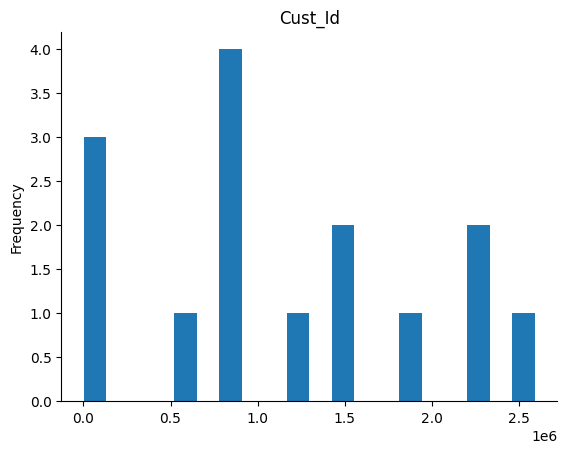

In [ ]:
from matplotlib import pyplot as plt
_df_0['Cust_Id'].plot(kind='hist', bins=20, title='Cust_Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
netflix_dataset.tail(20)

,Cust_Id,Ratings,Movie_Id
24058243,1061120,3.0,4499
24058244,1852040,1.0,4499
24058245,268846,4.0,4499
24058246,2368103,2.0,4499
24058247,529787,4.0,4499
24058248,441248,4.0,4499
24058249,2092745,5.0,4499
24058250,555962,5.0,4499
24058251,303969,2.0,4499
24058252,654591,3.0,4499


In [ ]:
f=['count','mean']

In [ ]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id').agg(f)
dataset_movie_summary.head(15)

Cust_Id               Ratings          
           count          mean   count      mean
Movie_Id                                        
1            547  1.249876e+06     547  3.749543
2            145  1.341926e+06     145  3.558621
3           2012  1.324290e+06    2012  3.641153
4            142  1.402854e+06     142  2.739437
5           1140  1.302384e+06    1140  3.919298
6           1019  1.336667e+06    1019  3.084396
7             93  1.454967e+06      93  2.129032
8          14910  1.335899e+06   14910  3.189805
9             95  1.356571e+06      95  2.621053
10           249  1.375478e+06     249  3.180723
11           198  1.369458e+06     198  3.030303
12           546  1.317936e+06     546  3.417582
13           125  1.371855e+06     125  4.552000
14           118  1.345424e+06     118  3.025424
15           290  1.355482e+06     290  3.286207

In [ ]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Ratings'].agg(f)

In [ ]:
dataset_movie_summary

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [ ]:
dataset_movie_summary['count'].quantile(0.7)

1798.6

In [ ]:
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.75))
movie_benchmark

2538

In [ ]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Int64Index([   1,    2,    3,    4,    5,    6,    7,    9,   10,   11,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=3374)

In [ ]:
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Ratings'].agg(f)
dataset_cust_summary

,count,mean
Cust_Id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [ ]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [ ]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401,
            2649404, 2649409, 2649421],
           dtype='int64', name='Cust_Id', length=327300)

In [ ]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print("The dataset after dropping/ trimming is ",netflix_dataset.shape)

The dataset after dropping/ trimming is  (16939081, 3)


In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163745 sha256=a633e7f3f99f0b0fc942bdf54b5a5908330626138d6eb5bac8d046c60f352c25
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# SVD: Singular Value Decomposition

df_title=pd.read_csv('/content/movie_titles (1).csv',encoding='ISO-8859-1',header=None,usecols=[0,1,2],names=['Movie_Id','Year','Name'])

In [ ]:
df_title.head()

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [ ]:
#Model Building for recommendation

import math
import seaborn as sns
from surprise import  Reader,Dataset,SVD
from surprise.model_selection import cross_validate


In [ ]:
# Reader is used in reading the data in the particular format so as it can be instered into our SVD  model

reader=Reader()

In [ ]:
data=Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Ratings']][:100000],reader)

In [ ]:
svd=SVD()

In [ ]:
cross_validate(svd,data,measures=['RMSE','MAE'],verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9927  0.9958  1.0031  0.9979  0.9981  0.9975  0.0034  
MAE (testset)     0.7899  0.7976  0.7998  0.7948  0.8039  0.7972  0.0047  
Fit time          1.81    1.80    1.77    1.78    2.71    1.97    0.37    
Test time         0.12    0.12    0.11    0.19    0.18    0.14    0.03    


{'test_rmse': array([0.99271527, 0.99581358, 1.00305476, 0.99785216, 0.99813305]),
 'test_mae': array([0.78985825, 0.79756266, 0.79983658, 0.79479152, 0.80394182]),
 'fit_time': (1.8118836879730225,
  1.8012821674346924,
  1.7710659503936768,
  1.7777678966522217,
  2.7118136882781982),
 'test_time': (0.11535835266113281,
  0.1213080883026123,
  0.11355876922607422,
  0.18967175483703613,
  0.17781281471252441)}

In [ ]:
# SVD: Singular Value Decomposition
netflix_dataset.head(50)

,Cust_Id,Ratings,Movie_Id
5106,824097,2.0,8
5109,785314,1.0,8
5110,243963,3.0,8
5112,1447783,4.0,8
5116,1912665,1.0,8
5117,588844,5.0,8
5119,1744889,1.0,8
5120,1216014,1.0,8
5122,2289614,3.0,8
5123,1777904,4.0,8


In [ ]:
dataset_1829027=netflix_dataset[(netflix_dataset['Cust_Id']==1829027)&(netflix_dataset['Ratings']==5)]

In [ ]:
dataset_1829027

,Cust_Id,Ratings,Movie_Id
5172,1829027,5.0,8
458448,1829027,4.0,143
531264,1829027,4.0,156
577605,1829027,5.0,175
951823,1829027,4.0,215
...,...,...,...
23185898,1829027,5.0,4356
23472592,1829027,2.0,4392
23499810,1829027,3.0,4393
23650052,1829027,3.0,4432


In [ ]:
user_1829027=df_title.copy()
user_1829027

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
user_1829027=user_1829027.reset_index()
user_1829027

,index,Movie_Id,Year,Name
0,0,1,2003.0,Dinosaur Planet
1,1,2,2004.0,Isle of Man TT 2004 Review
2,2,3,1997.0,Character
3,3,4,1994.0,Paula Abdul's Get Up & Dance
4,4,5,2004.0,The Rise and Fall of ECW
...,...,...,...,...
17765,17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17766,17767,2004.0,Fidel Castro: American Experience
17767,17767,17768,2000.0,Epoch
17768,17768,17769,2003.0,The Company


In [ ]:
user_1829027=user_1829027[~user_1829027['Movie_Id'].isin(drop_movie_list)]
user_1829027

,index,Movie_Id,Year,Name
7,7,8,2004.0,What the #$*! Do We Know!?
15,15,16,1996.0,Screamers
16,16,17,2005.0,7 Seconds
17,17,18,1994.0,Immortal Beloved
25,25,26,2004.0,Never Die Alone
...,...,...,...,...
17765,17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17766,17767,2004.0,Fidel Castro: American Experience
17767,17767,17768,2000.0,Epoch
17768,17768,17769,2003.0,The Company


In [ ]:
user_1829027['Estimated_rating']=user_1829027['Movie_Id'].apply(lambda x:svd.predict(1829027,x).est)

<ipython-input-115-f544812d5522>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1829027['Estimated_rating']=user_1829027['Movie_Id'].apply(lambda x:svd.predict(1829027,x).est)


In [ ]:
user_1829027=user_1829027.drop(['Movie_Id','index'],axis=1)

In [ ]:
user_1829027.sort_values('Estimated_rating',ascending=False)

,Year,Name,Estimated_rating
7,2004.0,What the #$*! Do We Know!?,4.398755
27,2002.0,Lilo and Stitch,3.992529
29,2003.0,Something's Gotta Give,3.912161
12976,1974.0,Free to Be You and Me,3.739303
12964,1974.0,Kolchak: The Night Stalker: The Complete Series,3.739303
...,...,...,...
8181,1998.0,In Heaven as it is on Earth,3.739303
17,1994.0,Immortal Beloved,3.609241
15,1996.0,Screamers,3.372497
16,2005.0,7 Seconds,2.935417
